<a href="https://colab.research.google.com/github/brandon-mason/cs4337-collabs/blob/collabs/Math_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vector Field

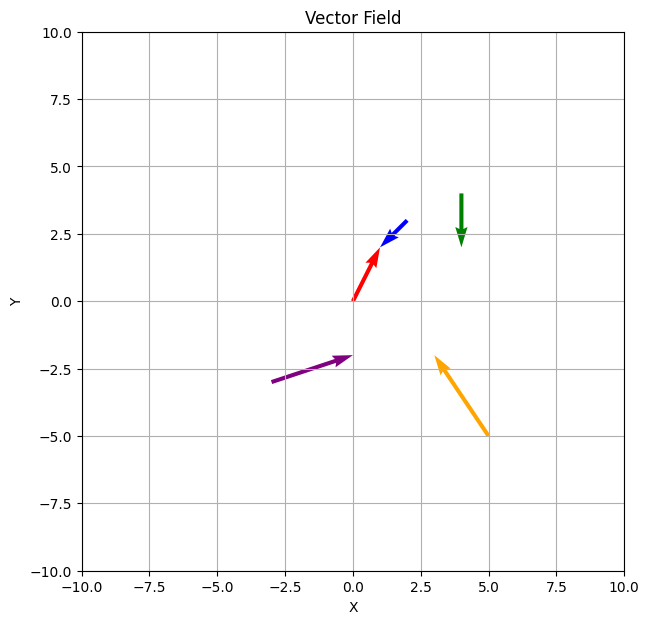

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

def plot_vector_fields(vectors: List[Tuple[Tuple[float, float], Tuple[float, float], str]]) -> None:
    """
    Visualize a vector field using Matplotlib.

    Parameters:
    vectors (List[Tuple[Tuple[float, float], Tuple[float, float], str]]):
        List of tuples where each tuple contains:
        - (x, y): Tuple of floats for the origin of the vector.
        - (u, v): Tuple of floats for the components of the vector.
        - vector_color: String representing the color of the vector.

    Returns:
    None: This function outputs a Matplotlib plot within a Jupyter Notebook.
    """
    plt.figure(figsize=(7, 7))

    for (x, y), (u, v), vector_color in vectors:
        plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=1, color=vector_color)

    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Vector Field')
    plt.grid()
    plt.show()

# Example usage:
# Define a list of vectors in the format [[(x1, y1), (u1, v1), "color"], [(x2, y2), (u2, v2), "color"], ...]

vectors = [
    [(0, 0), (1, 2), "red"],
    [(2, 3), (-1, -1), "blue"],
    [(4, 4), (0, -2), "green"],
    [(-3, -3), (3, 1), "purple"],
    [(5, -5), (-2, 3), "orange"],
]

# Call the function to plot the vector fields
plot_vector_fields(vectors)

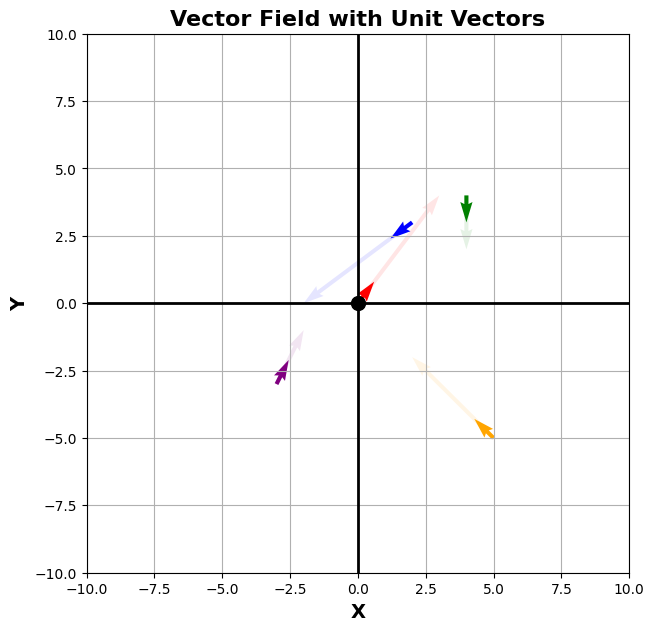

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

def plot_vector_fields(vectors: List[Tuple[Tuple[float, float], Tuple[float, float], str]]) -> None:
    """
    Visualize a vector field using Matplotlib.

    Parameters:
    vectors (List[Tuple[Tuple[float, float], Tuple[float, float], str]]):
        List of tuples where each tuple contains:
        - (x, y): Tuple of floats for the origin of the vector.
        - (u, v): Tuple of floats for the components of the vector.
        - vector_color: String representing the color of the vector.

    Returns:
    None: This function outputs a Matplotlib plot within a Jupyter Notebook.
    """
    plt.figure(figsize=(7, 7))

    for (x, y), (u, v), vector_color, opacity in vectors:
        plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=1, color=vector_color, alpha=opacity)

    # Highlight the origin
    plt.scatter(0, 0, color='black', s=100)  # Large black point at origin

    # Bold x and y axis
    plt.axhline(0, color='black', linewidth=2)
    plt.axvline(0, color='black', linewidth=2)

    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.xlabel('X', fontsize=14, fontweight='bold')
    plt.ylabel('Y', fontsize=14, fontweight='bold')
    plt.title('Vector Field with Unit Vectors', fontsize=16, fontweight='bold')
    plt.grid()
    plt.show()

def compute_and_plot_unit_vectors(vectors: List[Tuple[Tuple[float, float], Tuple[float, float], str]]) -> None:
    """
    Compute unit vectors for the input vectors and plot both original vectors and unit vectors.

    Parameters:
    vectors (List[Tuple[Tuple[float, float], Tuple[float, float], str]]):
        List of tuples where each tuple contains:
        - (x, y): Tuple of floats for the origin of the vector.
        - (u, v): Tuple of floats for the components of the vector.
        - vector_color: String representing the color of the vector.

    Returns:
    None: The function plots both the actual vectors and their unit vectors.
    """
    # Initialize a list to store unit vectors
    unit_vectors = []

    for (x, y), (u, v), vector_color, opacity in vectors:
        # Calculate the magnitude of the vector
        magnitude = np.sqrt(u**2 + v**2)

        # Avoid division by zero
        if magnitude != 0:
            u_unit = u / magnitude
            v_unit = v / magnitude
        else:
            u_unit = 0
            v_unit = 0

        # Append the unit vector with the same origin and color
        unit_vectors.append(((x, y), (u_unit, v_unit), vector_color, 1))

    # Plot both the original vectors and the unit vectors
    plot_vector_fields(vectors + unit_vectors)

# Example usage:
vectors = [
    [( 0, 0), ( 3,  4), "red",    0.1],      # Vector with a magnitude of 5
    [( 2, 3), (-4, -3), "blue",   0.1],   # Vector with a magnitude of 5
    [( 4, 4), ( 0, -2), "green",  0.1],   # Vector with a magnitude of 2
    [(-3,-3), ( 1,  2), "purple", 0.1], # Vector with a magnitude of sqrt(5)
    [( 5,-5), (-3,  3), "orange", 0.1], # Vector with a magnitude of 3*sqrt(2)
]

# Call the function to compute unit vectors and plot both original and unit vectors
compute_and_plot_unit_vectors(vectors)

# Norm of the vectors

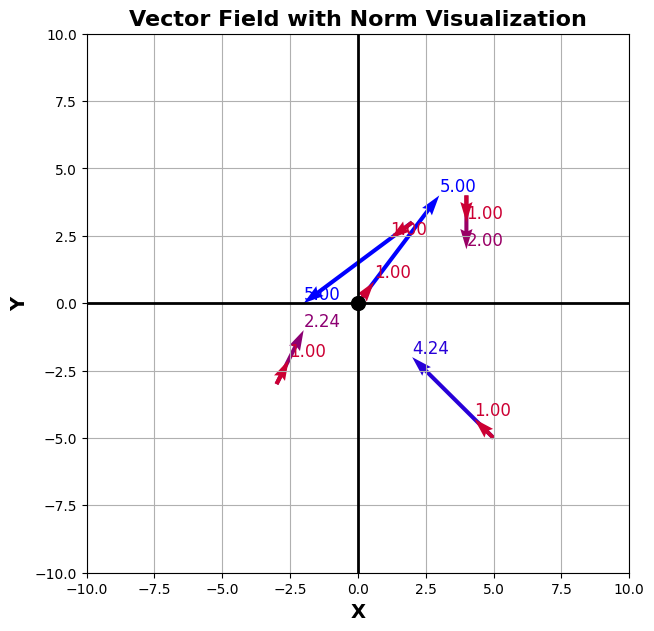

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

def plot_vector_fields(vectors: List[Tuple[Tuple[float, float], Tuple[float, float], float]]) -> None:
    """
    Visualize a vector field using Matplotlib, with color intensity representing the vector magnitude.

    Parameters:
    vectors (List[Tuple[Tuple[float, float], Tuple[float, float], float]]):
        List of tuples where each tuple contains:
        - (x, y): Tuple of floats for the origin of the vector.
        - (u, v): Tuple of floats for the components of the vector.
        - norm: Float representing the magnitude of the vector.

    Returns:
    None: This function outputs a Matplotlib plot within a Jupyter Notebook.
    """
    plt.figure(figsize=(7, 7))

    for (x, y), (u, v), norm in vectors:
        # Normalize the norm to a value between 0 and 1 for color intensity
        color_intensity = norm / max([vec[-1] for vec in vectors])
        color = (1 - color_intensity, 0, color_intensity)  # Red to blue gradient based on magnitude

        plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=1, color=color)
        plt.text(x + u, y + v, f'{norm:.2f}', fontsize=12, color=color, ha='left', va='bottom')

    # Highlight the origin
    plt.scatter(0, 0, color='black', s=100)  # Large black point at origin

    # Bold x and y axis
    plt.axhline(0, color='black', linewidth=2)
    plt.axvline(0, color='black', linewidth=2)

    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.xlabel('X', fontsize=14, fontweight='bold')
    plt.ylabel('Y', fontsize=14, fontweight='bold')
    plt.title('Vector Field with Norm Visualization', fontsize=16, fontweight='bold')
    plt.grid()
    plt.show()

def compute_and_plot_unit_vectors_with_norm(vectors: List[Tuple[Tuple[float, float], Tuple[float, float], str]]) -> None:
    """
    Compute unit vectors for the input vectors, visualize the norm, and plot both original vectors and unit vectors.

    Parameters:
    vectors (List[Tuple[Tuple[float, float], Tuple[float, float], str]]):
        List of tuples where each tuple contains:
        - (x, y): Tuple of floats for the origin of the vector.
        - (u, v): Tuple of floats for the components of the vector.
        - vector_color: String representing the color of the vector.

    Returns:
    None: The function plots both the actual vectors, their unit vectors, and visualizes the norm.
    """
    # Initialize lists to store original vectors with norms and unit vectors
    vectors_with_norms = []
    unit_vectors_with_norms = []

    for (x, y), (u, v), vector_color in vectors:
        # Calculate the magnitude (norm) of the vector
        norm = np.sqrt(u**2 + v**2)

        # Add the vector with its norm to the list
        vectors_with_norms.append(((x, y), (u, v), norm))

        # Avoid division by zero for unit vector calculation
        if norm != 0:
            u_unit = u / norm
            v_unit = v / norm
        else:
            u_unit = 0
            v_unit = 0

        # Append the unit vector with the same origin and the norm 1
        unit_vectors_with_norms.append(((x, y), (u_unit, v_unit), 1.0))  # Norm for unit vector is always 1

    # Plot both the original vectors (with norms) and the unit vectors
    plot_vector_fields(vectors_with_norms + unit_vectors_with_norms)

# Example usage:
vectors = [
    [(0, 0), (3, 4), "red"],      # Vector with a magnitude of 5
    [(2, 3), (-4, -3), "blue"],   # Vector with a magnitude of 5
    [(4, 4), (0, -2), "green"],   # Vector with a magnitude of 2
    [(-3, -3), (1, 2), "purple"], # Vector with a magnitude of sqrt(5)
    [(5, -5), (-3, 3), "orange"], # Vector with a magnitude of 3*sqrt(2)
]

# Call the function to compute unit vectors and plot both original and unit vectors with norm visualization
compute_and_plot_unit_vectors_with_norm(vectors)


# What happens if we change the norm of the vector?

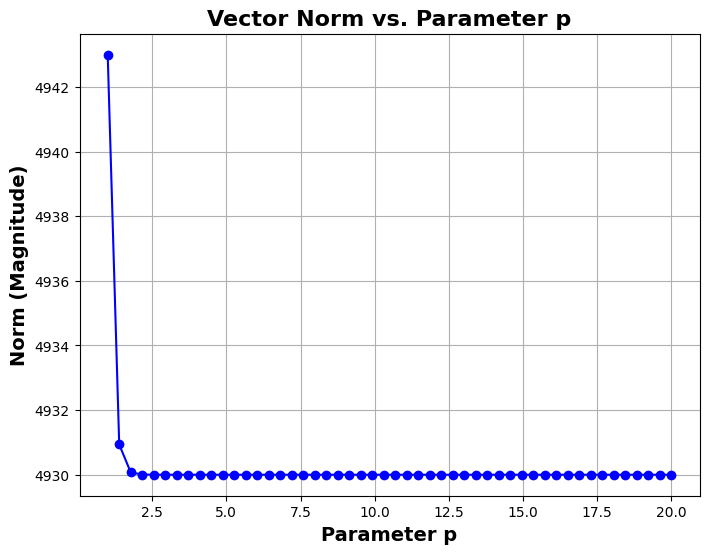

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_norms_over_p(p_values: np.ndarray, base_vector: np.ndarray) -> np.ndarray:
    """
    Compute the norms (magnitudes) of a vector scaled by a parameter p.

    Parameters:
    p_values (np.ndarray): Array of parameter values.
    base_vector (np.ndarray): The base vector components as a numpy array [u, v].

    Returns:
    np.ndarray: Array of norms (magnitudes) corresponding to each p value.
    """
    norms = []
    for p in p_values:
        norm = (base_vector ** p).sum() ** (1/p)
        norms.append(norm)
    return np.array(norms)

def plot_norm_vs_p(p_values: np.ndarray, norms: np.ndarray) -> None:
    """
    Plot the norm (magnitude) of a vector as a function of parameter p.

    Parameters:
    p_values (np.ndarray): Array of parameter values.
    norms (np.ndarray): Array of norms (magnitudes) corresponding to each p value.

    Returns:
    None: This function outputs a Matplotlib plot within a Jupyter Notebook.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(p_values, norms, marker='o', color='blue')
    plt.xlabel('Parameter p', fontsize=14, fontweight='bold')
    plt.ylabel('Norm (Magnitude)', fontsize=14, fontweight='bold')
    plt.title('Vector Norm vs. Parameter p', fontsize=16, fontweight='bold')
    plt.grid(True)
    plt.show()

# Example usage:
base_vector = np.array([13, 4930])  # A vector with initial components [u, v]
p_values = np.linspace(1, 20)  # Range of p values from 1 to 20.
norms = compute_norms_over_p(p_values, base_vector)

# Plot the norm vs. p
plot_norm_vs_p(p_values, norms)


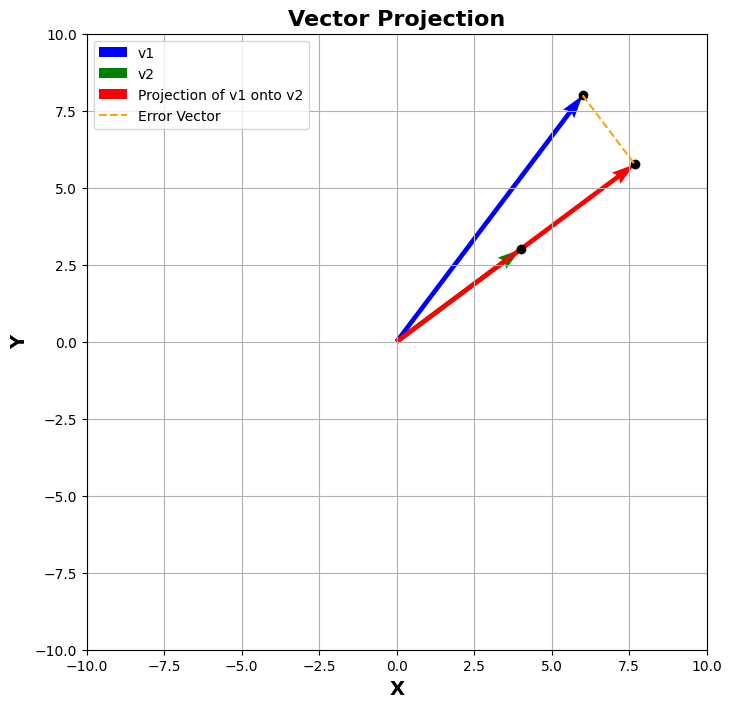

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector_projection(v1: np.ndarray, v2: np.ndarray) -> None:
    """
    Plot the projection of vector v1 onto vector v2.

    Parameters:
    v1 (np.ndarray): The vector to be projected, given as a numpy array [x1, y1].
    v2 (np.ndarray): The vector onto which v1 is projected, given as a numpy array [x2, y2].

    Returns:
    None: This function outputs a Matplotlib plot within a Jupyter Notebook.
    """
    # Compute the projection of v1 onto v2
    v2_norm = np.linalg.norm(v2)
    projection_length = np.dot(v1, v2) / v2_norm
    projection_vector = (projection_length / v2_norm) * v2

    plt.figure(figsize=(8, 8))

    # Plot the original vectors
    plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v1')
    plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='green', label='v2')

    # Plot the projection vector
    plt.quiver(0, 0, projection_vector[0], projection_vector[1], angles='xy', scale_units='xy', scale=1, color='red', label='Projection of v1 onto v2')

    # Plot the line connecting the projection point to v1 (error vector)
    plt.plot([v1[0], projection_vector[0]], [v1[1], projection_vector[1]], color='orange', linestyle='--', label='Error Vector')

    # Plot the points where the vectors end
    plt.scatter([v1[0], v2[0], projection_vector[0]], [v1[1], v2[1], projection_vector[1]], color='black')

    # Set plot limits
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)

    # Set plot labels and title
    plt.xlabel('X', fontsize=14, fontweight='bold')
    plt.ylabel('Y', fontsize=14, fontweight='bold')
    plt.title('Vector Projection', fontsize=16, fontweight='bold')

    # Add a grid and legend
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
v1 = np.array([6, 8])   # Vector to be projected
v2 = np.array([4, 3])   # Vector onto which v1 is projected

# Call the function to plot the projection
plot_vector_projection(v1, v2)

# Matrix, Transformation & Eigen Values and Vectors

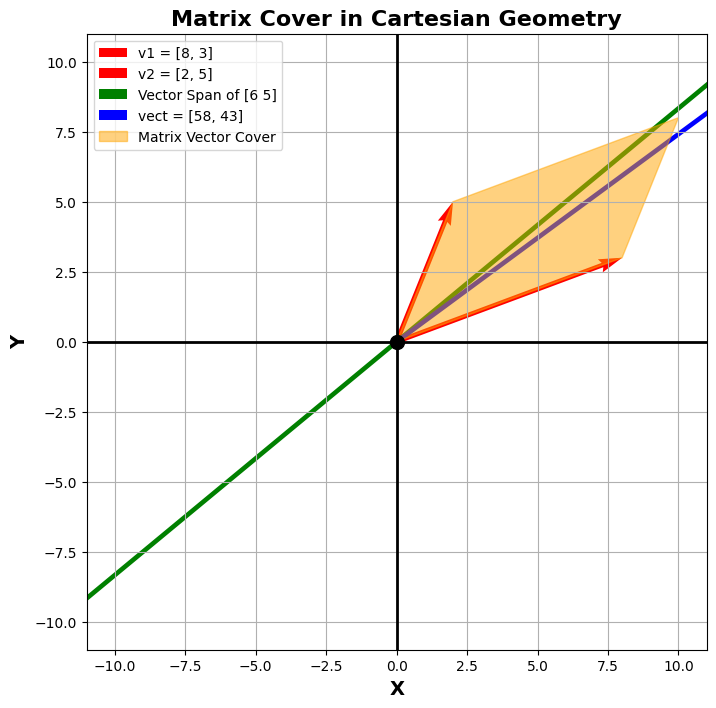

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_transformation(span: np.ndarray = None) -> None:
  """
  Create a partial function that plot the span of a vector in Cartesian coordinates
  and return a function to plot the matrix cover by two vectors and the vector

  Parameters:
    vect: np.ndarray
  """
  if span is not None:
    span_u = span * 1000
    span_d = span * -1000

  def cover(matrix: np.ndarray, vect : np.ndarray) -> None:
      """
      Plot the matrix cover formed by two vectors in Cartesian coordinates.

      Parameters:
      matrix (np.ndarray): The matrix, of form [[a,b], [c,d]]

      Returns:
      None: This function outputs a Matplotlib plot within a Jupyter Notebook.
      """
      v1, v2 = matrix.T
      plt.figure(figsize=(8, 8))

      # Plot the vectors
      plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'v1 = [{v1[0]}, {v1[1]}]')
      plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'v2 = [{v2[0]}, {v2[1]}]')

      if span is not None:
        plt.quiver(0, 0, span_u[0], span_u[1], angles='xy', scale_units='xy', scale=1, color='green', label=f'Vector Span of {span}')
        plt.quiver(0, 0, span_d[0], span_d[1], angles='xy', scale_units='xy', scale=1, color='green')

      plt.quiver(0, 0, vect[0], vect[1], angles='xy', scale_units='xy', scale=1, color='blue', label=f'vect = [{vect[0]}, {vect[1]}]')

      # Calculate the vertices of the parallelogram
      origin = np.array([0, 0])
      v1_v2 = v1 + v2
      vertices = np.array([origin, v1, v1_v2, v2])

      # Fill the region covered by the vectors (parallelogram)
      plt.fill(vertices[:, 0], vertices[:, 1], color='orange', alpha=0.5, label='Matrix Vector Cover')

      # Set plot limits
      limit = max(np.max(np.abs(vertices)) + 1, 10)
      plt.xlim(-limit, limit)
      plt.ylim(-limit, limit)

      # Set plot labels and title
      plt.xlabel('X', fontsize=14, fontweight='bold')
      plt.ylabel('Y', fontsize=14, fontweight='bold')
      plt.title('Matrix Cover in Cartesian Geometry', fontsize=16, fontweight='bold')


      # Highlight the origin
      plt.scatter(0, 0, color='black', s=100)  # Large black point at origin

      # Bold x and y axis
      plt.axhline(0, color='black', linewidth=2)
      plt.axvline(0, color='black', linewidth=2)

      # Add a grid and legend
      plt.grid(True)
      plt.legend()

      # Show the plot
      plt.show()
  return cover


matrix = np.array(
    [[8,2],
     [3,5]]
)
vect = np.array([6, 5])

plot_matrix_cover = plot_transformation(vect)
# Call the function to plot the matrix cover
plot_matrix_cover(matrix, matrix @ vect)

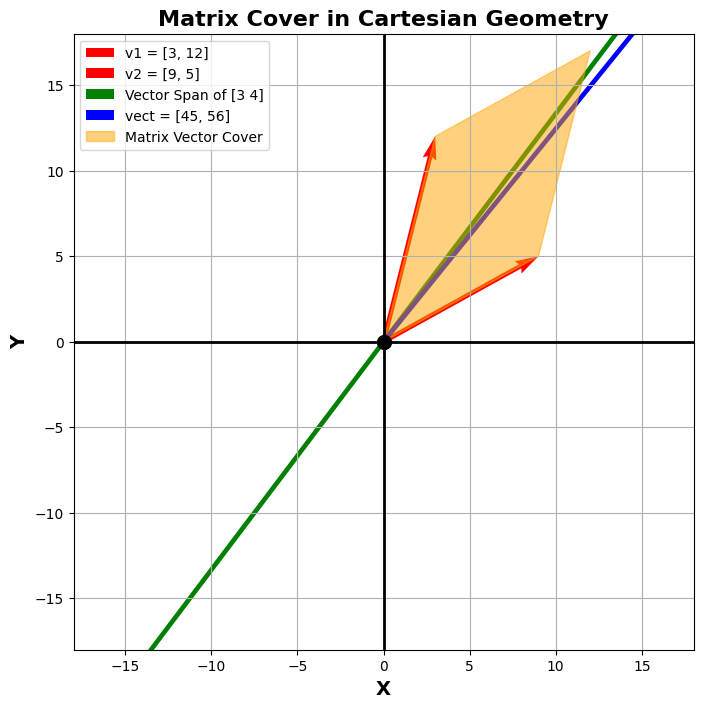

In [ ]:
# Example usage:
matrix = np.array(
    [[3,9],
     [12,5]]
)

vect = np.array([3, 4])
plot_matrix_cover = plot_transformation(vect)
plot_matrix_cover(matrix, matrix @ vect)

In [ ]:
ev = np.linalg.eig(matrix)
print(ev)
v1, v2 = ev.eigenvectors.T

EigResult(eigenvalues=array([-6.44030651, 14.44030651]), eigenvectors=array([[-0.69002624, -0.61829666],
       [ 0.72378435, -0.78594481]]))


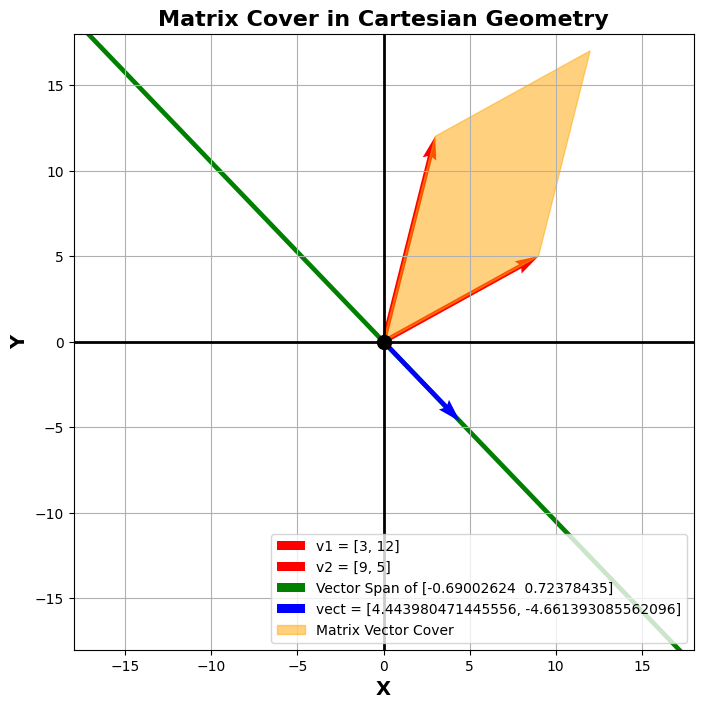

In [ ]:
plot_matrix_cover = plot_transformation(v1)
plot_matrix_cover(matrix, matrix @ v1)

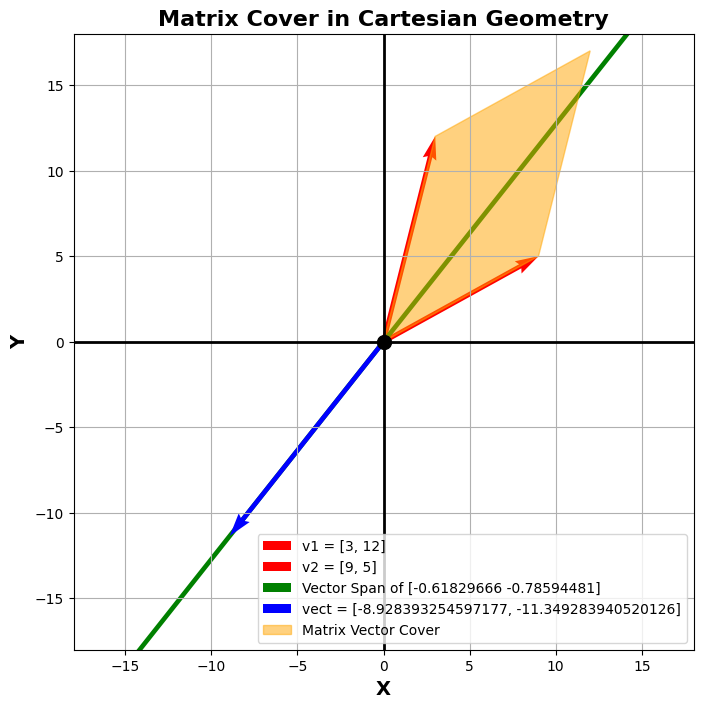

In [ ]:
plot_matrix_cover = plot_transformation(v2)
plot_matrix_cover(matrix, matrix @ v2)

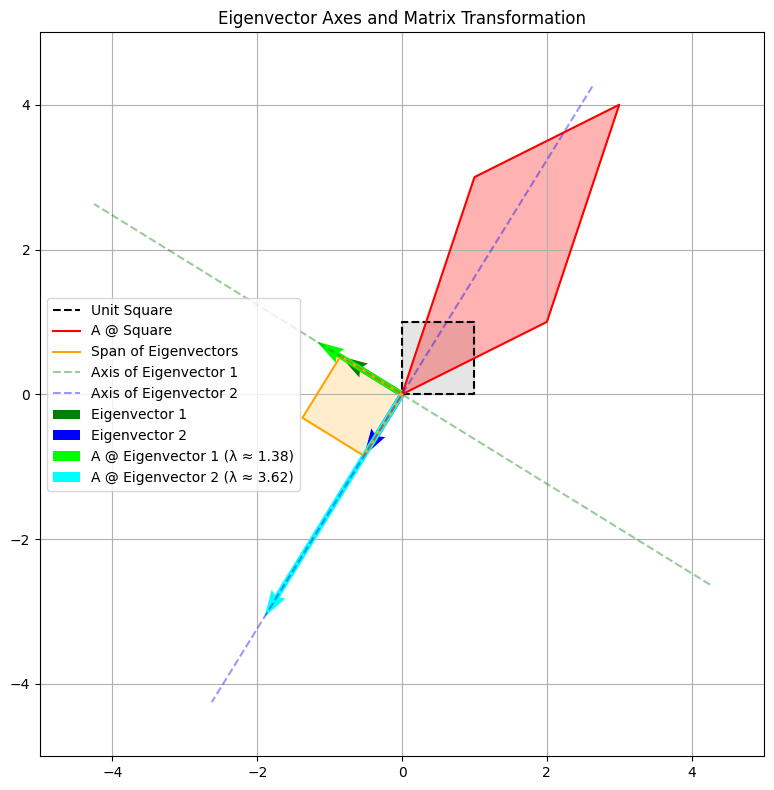

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def build_basis_matrix(vec1, vec2):
    """Create a transformation matrix using two vectors as columns."""
    return np.column_stack((vec1, vec2))

# Define transformation matrix A
A = np.array([[2, 1],
              [1, 3]])

# Define the unit square
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).T

# Apply A to the square
transformed_square = A @ square

# Eigen decomposition
eigvals, eigvecs = np.linalg.eig(A)
eigvec1 = eigvecs[:, 0]
eigvec2 = eigvecs[:, 1]
eigval1 = eigvals[0]
eigval2 = eigvals[1]

# Transformed eigenvectors
eigvec1_trans = A @ eigvec1
eigvec2_trans = A @ eigvec2

# Create transformation matrix from eigenvector basis (no scaling)
eigen_basis = build_basis_matrix(eigvec1, eigvec2)
transformed_by_eigen_basis = eigen_basis @ square

# Generate points for extended eigenvector axes
scale = 5
line1 = np.array([[-scale, scale]])
line2 = np.array([[-scale, scale]])
axis1 = np.outer(eigvec1, line1).squeeze()
axis2 = np.outer(eigvec2, line2).squeeze()

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot unit square
ax.plot(*square, 'k--', label='Unit Square')
ax.fill(*square, color='gray', alpha=0.2)

# Plot transformed square by A
ax.plot(*transformed_square, 'r-', label='A @ Square')
ax.fill(*transformed_square, color='red', alpha=0.3)

# Plot square transformed by eigenvector span
ax.plot(*transformed_by_eigen_basis, 'orange', label='Span of Eigenvectors')
ax.fill(*transformed_by_eigen_basis, color='orange', alpha=0.2)

# Plot eigenvector axes (dashed lines)
ax.plot(axis1[0], axis1[1], linestyle='--', color='green', alpha=0.4, label='Axis of Eigenvector 1')
ax.plot(axis2[0], axis2[1], linestyle='--', color='blue', alpha=0.4, label='Axis of Eigenvector 2')

# Plot eigenvectors
ax.quiver(0, 0, *eigvec1, color='green', angles='xy', scale_units='xy', scale=1, label='Eigenvector 1')
ax.quiver(0, 0, *eigvec2, color='blue', angles='xy', scale_units='xy', scale=1, label='Eigenvector 2')

# Plot transformed eigenvectors (A @ eigenvectors)
ax.quiver(0, 0, *eigvec1_trans, color='lime', angles='xy', scale_units='xy', scale=1,
          label=f'A @ Eigenvector 1 (λ ≈ {eigval1:.2f})')
ax.quiver(0, 0, *eigvec2_trans, color='cyan', angles='xy', scale_units='xy', scale=1,
          label=f'A @ Eigenvector 2 (λ ≈ {eigval2:.2f})')

# Format plot
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title("Eigenvector Axes and Matrix Transformation")

plt.tight_layout()
plt.show()

Given the eigenvalues of a $(2 \times 2)$ matrix, you can compute the corresponding eigenvectors using the following steps:

### Steps to Compute Eigenvectors Given Eigenvalues

1. **Start with the eigenvalue equation**:
   $
   A \mathbf{v} = \lambda \mathbf{v}
   $
   where $A$ is the matrix, $\lambda$ is an eigenvalue, and $\mathbf{v}$ is the corresponding eigenvector.

2. **Rearrange the equation**:
   $
   (A - \lambda I) \mathbf{v} = 0
   $
   where $I$ is the identity matrix.

3. **Form the matrix equation**:
   Construct the matrix $A - \lambda I$, where you subtract $\lambda$ from the diagonal elements of $A$.

4. **Solve the system**:
   The resulting matrix equation will be:
   $
   \begin{bmatrix}
   a_{11} - \lambda & a_{12} \\
   a_{21} & a_{22} - \lambda
   \end{bmatrix}
   \begin{bmatrix}
   x_1 \\
   x_2
   \end{bmatrix}
   =
   \begin{bmatrix}
   0 \\
   0
   \end{bmatrix}
   $
   Solve this system of linear equations to find the eigenvector $\mathbf{v} = [x_1, x_2]^T$.

### Explanation:

1. **Matrix $A$ and Eigenvalues**:
   - We define a matrix $A$ and assume we have already computed its eigenvalues (either manually, using a characteristic equation, or through a library function).

2. **Subtracting $\lambda I$**:
   - The function `compute_eigenvector` subtracts $\lambda I$ from $A$ to form the matrix $A - \lambda I$.

3. **Solving for the Eigenvector**:
   - The function uses Singular Value Decomposition (SVD) via `np.linalg.svd` to find the null space of the matrix $A - \lambda I$, which corresponds to the eigenvector.

4. **Example Usage**:
   - The matrix $A$ is provided, and the eigenvectors corresponding to the given eigenvalues are computed.

Eigenvalues and eigenvectors play a crucial role in many machine learning algorithms and techniques, particularly in dimensionality reduction, data compression, and understanding the underlying structure of data. Here's how they are important in a machine learning context:

### 1. **Principal Component Analysis (PCA)**
   - **PCA** is one of the most widely used dimensionality reduction techniques in machine learning.
   - **Eigenvectors** of the covariance matrix of the data represent the directions (principal components) in which the data varies the most.
   - **Eigenvalues** correspond to the amount of variance captured by each principal component.
   - By projecting the data onto a few principal components with the largest eigenvalues, PCA reduces the dimensionality of the data while retaining most of the variance (information).

   **Example**: In image compression, PCA can be used to reduce the number of features (pixels) by finding the principal components, which are the eigenvectors of the covariance matrix. This allows the image to be represented with fewer components, reducing storage requirements while preserving image quality.

### 2. **Singular Value Decomposition (SVD)**
   - SVD is a generalization of the eigendecomposition for rectangular matrices and is widely used in various machine learning applications.
   - SVD decomposes a matrix into three matrices, where the eigenvectors of the original matrix are used in this decomposition.
   - **Eigenvalues** in SVD correspond to the singular values, which give insights into the amount of information (variance) captured by each component.

   **Example**: In **recommender systems**, SVD is used in matrix factorization techniques to decompose a user-item interaction matrix, helping to predict user preferences by finding latent factors (eigenvectors) in the data.

### 3. **Linear Discriminant Analysis (LDA)**
   - **LDA** is a technique used for classification and dimensionality reduction.
   - In LDA, eigenvectors and eigenvalues are computed from the scatter matrices (between-class and within-class scatter matrices).
   - The eigenvectors corresponding to the largest eigenvalues define the linear discriminants, which are the directions that maximize the separation between different classes.

   **Example**: LDA is used in face recognition, where it reduces the dimensionality of facial images while maximizing the separation between different classes (e.g., different people).

### 4. **Graph-Based Methods**
   - Eigenvectors and eigenvalues are fundamental in analyzing graphs and networks, which are increasingly used in machine learning.
   - The **Laplacian matrix** of a graph, used in spectral clustering, involves eigenvalues and eigenvectors. The eigenvectors corresponding to the smallest eigenvalues help partition the graph into clusters.

   **Example**: **Spectral clustering** is used to identify communities in social networks, where the graph's structure is analyzed using the eigenvectors of the Laplacian matrix.

### 5. **Stability and Dynamics Analysis**
   - In machine learning models, especially in optimization and training algorithms, eigenvalues of the Hessian matrix (second derivative matrix) provide insights into the curvature of the loss surface.
   - **Eigenvalues** help determine whether the model has reached a local minimum, maximum, or saddle point during training.

   **Example**: In training deep neural networks, understanding the eigenvalues of the Hessian can help in tuning learning rates and understanding the difficulty of the optimization problem.

### 6. **Quantum Machine Learning**
   - In quantum machine learning, eigenvalues and eigenvectors are crucial for quantum operations, particularly in algorithms like quantum PCA, where they are used to extract principal components efficiently on quantum computers.

   **Example**: Quantum algorithms leverage the properties of eigenvectors and eigenvalues to perform faster data analysis and pattern recognition.

### 7. **Feature Importance and Interpretability**
   - Eigenvectors can be used to interpret the importance of features in a dataset. Features corresponding to the largest eigenvalues (in PCA, for example) are considered the most important.
   - Understanding the directions (eigenvectors) in which data varies can provide insights into the underlying patterns and structure in the data.

### Step-by-Step PCA Example



#### Step 1: Generate a Toy Dataset
We'll create a 2D dataset with a clear linear pattern.



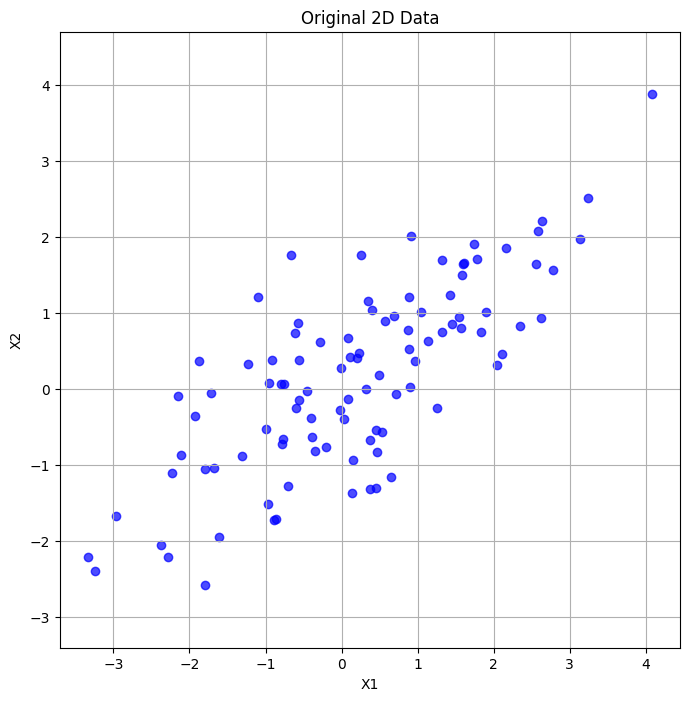

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple 2D dataset
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]  # covariance matrix
X = np.random.multivariate_normal(mean, cov, 100)

# Plot the dataset
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, color='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original 2D Data')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
X.shape

(100, 2)


#### Step 2: Standardize the Data
PCA requires the data to be centered around the origin, so we'll standardize the dataset by subtracting the mean.



In [ ]:
# Standardize the dataset
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

#### Step 3: Compute the Covariance Matrix
The covariance matrix captures the variance and the correlation between the features.



In [ ]:
# Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[2.28165958 1.40082016]
 [1.40082016 1.50064765]]


#### Step 4: Compute the Eigenvectors and Eigenvalues
Eigenvectors represent the directions of maximum variance (principal components), and eigenvalues represent the magnitude of the variance in those directions.



In [ ]:
# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [3.34538606 0.43692116]
Eigenvectors:
 [[ 0.79640776 -0.60476002]
 [ 0.60476002  0.79640776]]


#### Step 5: Project the Data onto the Principal Components
We'll project the data onto the principal components to reduce the dimensionality.



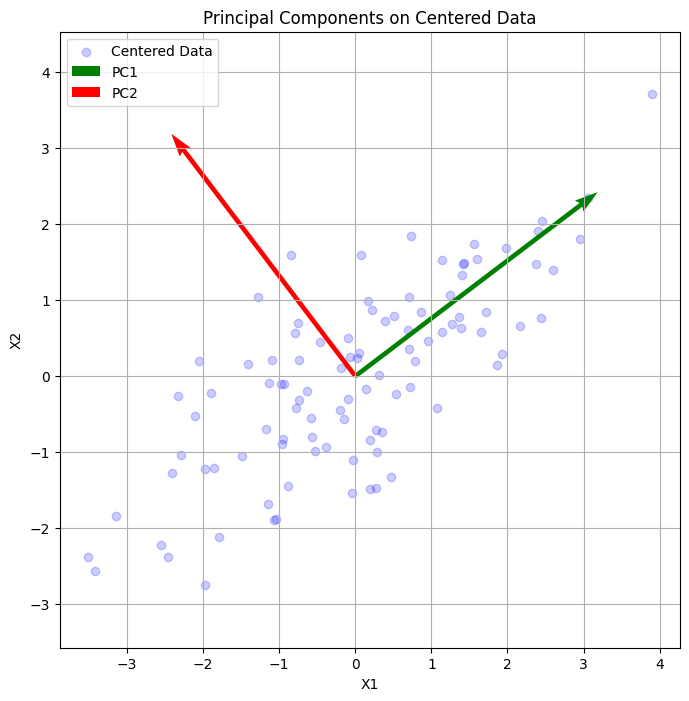

In [ ]:
# Project the data onto the eigenvectors (principal components)
X_pca = X_centered.dot(eigenvectors)

# Plot the original data and the principal components
plt.figure(figsize=(8, 8))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.2, color='blue', label='Centered Data')

# Draw the eigenvectors (principal components)
for i in range(len(eigenvalues)):
    color = ['green', 'red']
    plt.quiver(0, 0, eigenvectors[0, i]*20, eigenvectors[1, i]*20,
               angles='xy', scale_units='xy', scale=5, color=color[i], label=f'PC{i+1}')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Principal Components on Centered Data')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

#### Step 6: Visualize the Projected Data
Now, we'll plot the data in the new coordinate system defined by the principal components.



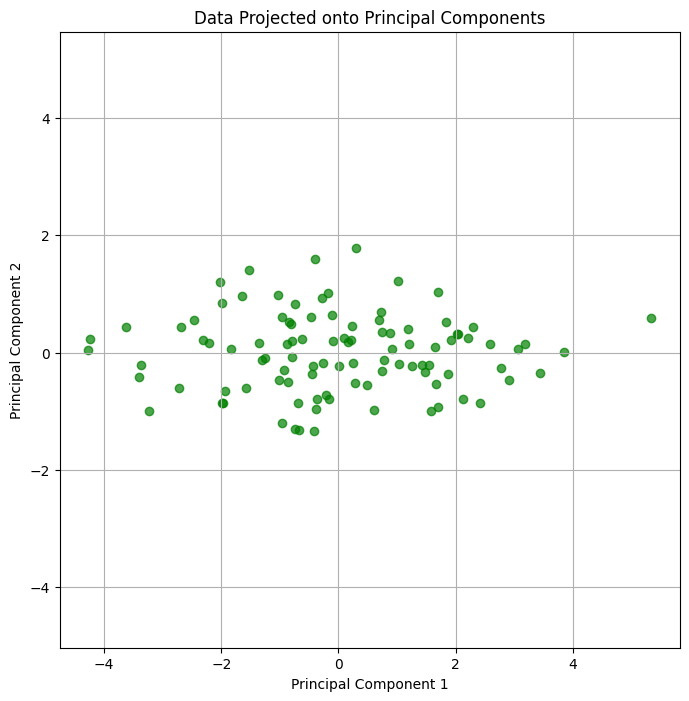

In [ ]:
# Plot the projected data
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color='green')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Projected onto Principal Components')
plt.grid(True)
plt.axis('equal')
plt.show()

### Explanation

1. **Original Data**:
   - The initial scatter plot shows the original 2D dataset. The data points have a linear pattern, indicating that most of the variance is along a certain direction.

2. **Covariance Matrix**:
   - The covariance matrix shows how the features (X1 and X2) vary together. Off-diagonal elements indicate the degree of correlation between features.

3. **Eigenvectors and Eigenvalues**:
   - Eigenvectors are the directions of maximum variance (principal components).
   - Eigenvalues indicate the magnitude of variance in these directions.

4. **Principal Components**:
   - The eigenvectors (principal components) are plotted as red arrows on the centered data. These arrows show the directions of maximum variance.
   - The first principal component (PC1) corresponds to the direction with the largest variance.

5. **Projected Data**:
   - The final plot shows the data projected onto the principal components. After projection, the data's variance is maximized along the first principal component, reducing dimensionality while preserving most of the information.

## Why Scaling?

Scaling (or standardization) is a crucial preprocessing step in Principal Component Analysis (PCA) because it ensures that all features contribute equally to the analysis. Here’s a detailed explanation of why scaling is necessary in PCA:

### 1. **Variance and Covariance Depend on Scale**

- **Variance** is a measure of how much the data varies from the mean. In PCA, the principal components are the directions in which the variance of the data is maximized.
- **Covariance** measures the relationship between pairs of features. In PCA, the covariance matrix is used to identify the directions (principal components) along which the variance of the data is greatest.

If the features of the dataset have different scales, the variance of each feature will be influenced by the scale of the data. For example, consider a dataset with two features:

- **Feature 1**: Height in centimeters (e.g., ranging from 150 to 200).
- **Feature 2**: Weight in kilograms (e.g., ranging from 50 to 100).

Without scaling, the variance in the height feature will be much larger than the variance in the weight feature simply because the numerical range of height is larger (150 to 200) than that of weight (50 to 100). This discrepancy means that PCA will likely assign more importance to the height feature because of its larger variance, not necessarily because it contains more significant information.

### 2. **Impact on Principal Components**

PCA aims to find the directions (principal components) that capture the most variance in the data. If the data is not scaled:

- The principal components will be biased toward features with larger variances, even if those variances are due to the scale of the measurements rather than the intrinsic variability of the feature.
- As a result, PCA might identify directions in the feature space that are dominated by one or a few features simply because they have larger numerical values.

### 3. **Ensuring Equal Contribution of Features**

To ensure that all features contribute equally to the analysis, it's necessary to scale the data so that each feature has the same variance. This is typically done by standardizing the data:

$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$

Where:
- $X$ is the original data.
- $\mu$ is the mean of the feature.
- $\sigma$ is the standard deviation of the feature.

After scaling, all features will have a mean of 0 and a standard deviation (variance) of 1. This ensures that:

- The principal components are not biased toward features with larger numerical ranges.
- The directions identified by PCA reflect true patterns in the data, not artifacts of differing scales.

### 4. **Example to Illustrate the Need for Scaling**

Consider the following example without scaling:

- Feature 1: Heights (in cm): [150, 160, 170, 180, 190]
- Feature 2: Weights (in kg): [50, 60, 70, 80, 90]

If we perform PCA on this dataset without scaling:

- The principal component will be heavily influenced by the height feature because its variance (in terms of numerical values) is much larger than that of weight.
- This could lead to misleading results where the PCA emphasizes the height feature, even if both features are equally important.

However, if we scale the data:

- Both features will have the same variance (1 after standardization), ensuring that PCA will treat both features equally and identify the true directions of maximum variance.

### 5. **When Scaling Might Not Be Necessary**

In some cases, scaling may not be necessary, such as when:

- All features are already on the same scale (e.g., all are percentages or normalized values).
- The differences in scale are meaningful, and you want the principal components to reflect those differences (though this is rare in typical PCA applications).

## Some Application

Certainly! Anomaly detection using Principal Component Analysis (PCA) is a powerful technique to identify outliers in high-dimensional data. PCA can reduce the dimensionality of the data while preserving most of its variance, making it easier to detect anomalies that do not conform to the normal patterns in the data.

### Example: Anomaly Detection in a 2D Dataset Using PCA

#### Step 1: Generate a Toy Dataset
Let's create a 2D dataset with some anomalies (outliers).



In [ ]:
!pip install -q drawdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/

In [ ]:
from drawdata import draw_scatter

In [ ]:
draw_scatter()

In [ ]:
import pandas as pd
pd.read_clipboard(sep = ",")

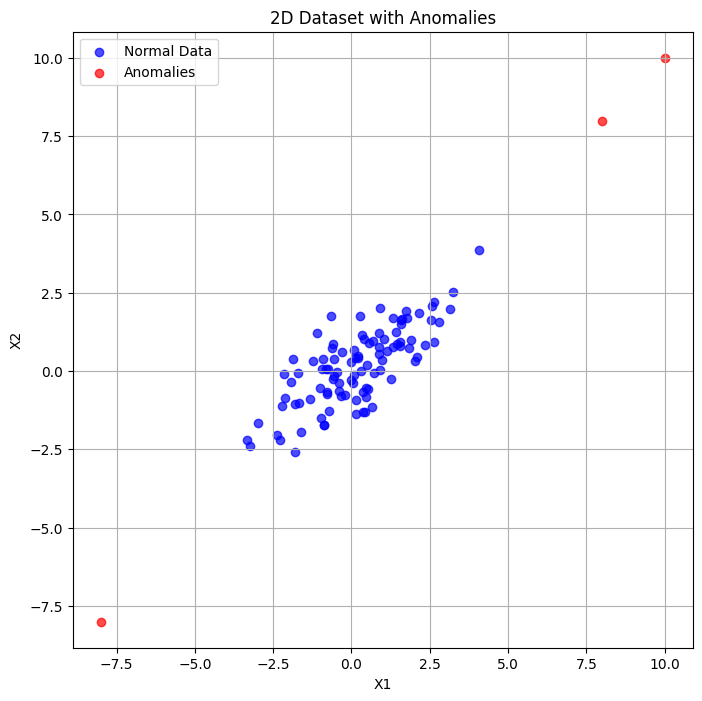

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 2D dataset
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]  # covariance matrix for normal data
X_normal = np.random.multivariate_normal(mean, cov, 100)

# Add some anomalies (outliers)
X_anomalies = np.array([[8, 8], [10, 10], [-8, -8]])

# Combine the normal data with anomalies
X = np.vstack([X_normal, X_anomalies])

# Plot the dataset
plt.figure(figsize=(8, 8))
plt.scatter(X_normal[:, 0], X_normal[:, 1], alpha=0.7, color='blue', label='Normal Data')
plt.scatter(X_anomalies[:, 0], X_anomalies[:, 1], alpha=0.7, color='red', label='Anomalies')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Dataset with Anomalies')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Step 2: Perform PCA on the Dataset
We'll apply PCA to reduce the data to 1D by projecting it onto the first principal component.



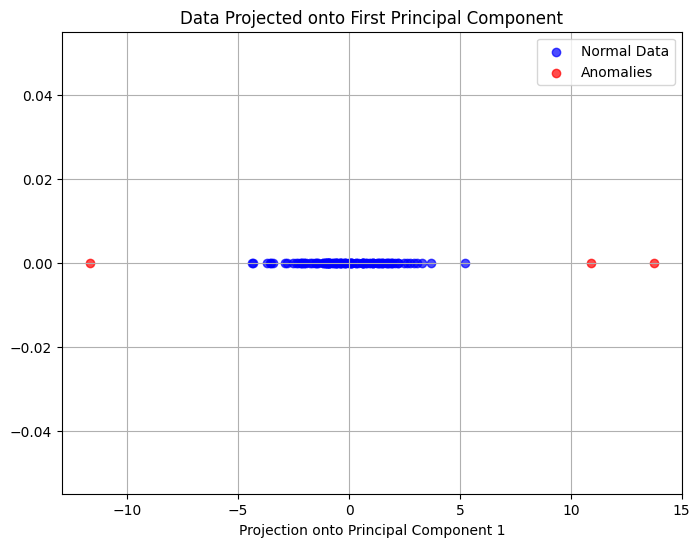

In [ ]:
from sklearn.decomposition import PCA

# Standardize the data (mean=0, variance=1)
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Apply PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_centered)

# Plot the data projected onto the first principal component
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:100], np.zeros_like(X_pca[:100]), alpha=0.7, color='blue', label='Normal Data')
plt.scatter(X_pca[100:], np.zeros_like(X_pca[100:]), alpha=0.7, color='red', label='Anomalies')
plt.xlabel('Projection onto Principal Component 1')
plt.title('Data Projected onto First Principal Component')
plt.legend()
plt.grid(True)
plt.show()

#### Step 3: Identify Anomalies Using PCA Reconstruction Error
To detect anomalies, we can use the reconstruction error, which is the difference between the original data and its projection back to the original space from the principal components.



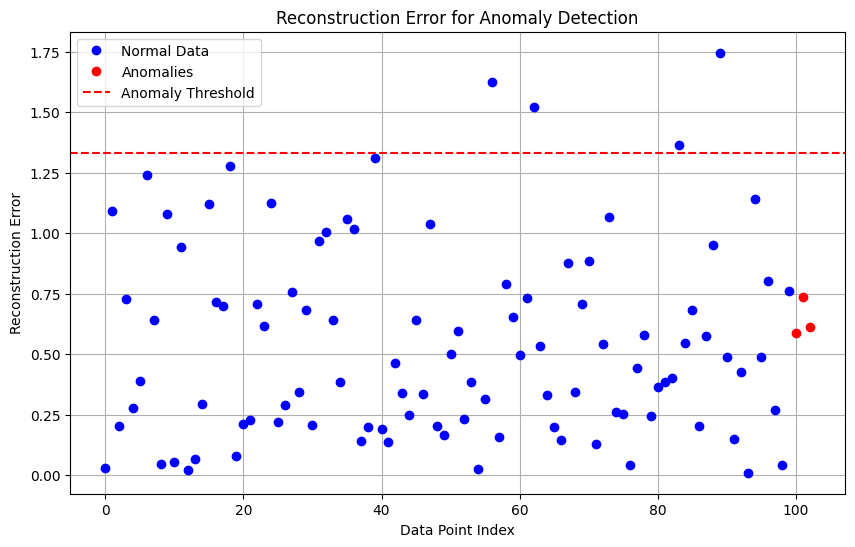

In [ ]:
# Reconstruct the data from the PCA projection
X_reconstructed = pca.inverse_transform(X_pca)

# Compute the reconstruction error
reconstruction_error = np.sqrt(np.sum((X_centered - X_reconstructed) ** 2, axis=1))

# Plot the reconstruction error
plt.figure(figsize=(10, 6))
plt.plot(reconstruction_error[:100], 'bo', label='Normal Data')
plt.plot(np.arange(100, 103), reconstruction_error[100:], 'ro', label='Anomalies')
plt.axhline(y=np.mean(reconstruction_error) + 2*np.std(reconstruction_error), color='red', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Data Point Index')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error for Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()

### Explanation:

1. **Original Data with Anomalies**:
   - We generate a 2D dataset where most of the data points are normally distributed, and a few points are introduced as anomalies (outliers).

2. **PCA Projection**:
   - The dataset is standardized (centered), and PCA is applied to reduce the dimensionality to 1D. This allows us to project the data onto the first principal component, which captures the most variance.
   - The anomalies are plotted in red, and the normal data is plotted in blue. Anomalies typically have larger deviations along the principal component compared to normal data.

3. **Reconstruction Error for Anomaly Detection**:
   - The reconstruction error is calculated as the Euclidean distance between the original data and the data reconstructed from the principal components.
   - A high reconstruction error indicates that the data point doesn't fit well within the principal component space, suggesting it might be an anomaly.
   - A threshold is drawn (mean + 2 standard deviations) to distinguish between normal data and anomalies. Points above this threshold are flagged as anomalies.

# LDA

Linear Discriminant Analysis (LDA) is a powerful technique used for classification and dimensionality reduction. From a mathematical perspective, LDA works by finding the linear combinations of features that best separate the classes. Here's a step-by-step explanation of how LDA works, and how it relates to eigenvalues and eigenvectors.

### Step 1: Understanding the Objective of LDA

LDA seeks to find a new set of axes (linear combinations of the original features) that maximize the separation between different classes. To do this, LDA maximizes the **between-class variance** while minimizing the **within-class variance**.

- **Between-Class Variance**: Measures how far the means of different classes are from the overall mean.
- **Within-Class Variance**: Measures the spread of data points within each class.

### Step 2: Formulating the Problem

Given a dataset with $ n $ samples and $ d $ features, where each sample belongs to one of $ k $ classes:

1. **Mean Vectors**: Calculate the mean vector for each class $ \mu_i $ and the overall mean vector $ \mu $.

   $
   \mu_i = \frac{1}{n_i} \sum_{x_j \in C_i} x_j, \quad \mu = \frac{1}{n} \sum_{j=1}^{n} x_j
   $

   where $ C_i $ is the set of samples in class $ i $, and $ n_i $ is the number of samples in class $ i $.

2. **Scatter Matrices**:
   - **Within-Class Scatter Matrix $ S_W $**: Measures the scatter (variance) within each class.

     $
     S_W = \sum_{i=1}^{k} S_i = \sum_{i=1}^{k} \sum_{x_j \in C_i} (x_j - \mu_i)(x_j - \mu_i)^T
     $

   - **Between-Class Scatter Matrix $ S_B $**: Measures the scatter (variance) between the class means.

     $
     S_B = \sum_{i=1}^{k} n_i (\mu_i - \mu)(\mu_i - \mu)^T
     $

### Step 3: The Optimization Problem

LDA aims to maximize the ratio of the between-class scatter to the within-class scatter. This is formulated as an optimization problem:

$
\text{arg max}_W \frac{|W^T S_B W|}{|W^T S_W W|}
$

Here, $ W $ is the matrix of linear discriminants (eigenvectors). The idea is to find the matrix $ W $ that maximizes this ratio.

### Step 4: Solving the Generalized Eigenvalue Problem

To solve this optimization problem, we transform it into a generalized eigenvalue problem:

$
S_W^{-1} S_B W = \Lambda W
$

Where:
- $ \Lambda $ is a diagonal matrix containing the eigenvalues.
- $ W $ is the matrix whose columns are the eigenvectors corresponding to these eigenvalues.

### Step 5: Eigenvalues and Eigenvectors in LDA

- **Eigenvectors**: The eigenvectors $ W $ corresponding to the largest eigenvalues define the directions in which the classes are best separated. These directions are the linear discriminants.
- **Eigenvalues**: The eigenvalues indicate the amount of variance captured by each eigenvector. In LDA, they represent the effectiveness of the separation between the classes along each discriminant axis.

### Step 6: Dimensionality Reduction

If there are $ k $ classes, LDA can reduce the dimensionality of the data to at most $ k-1 $ dimensions by selecting the top $ k-1 $ eigenvectors (the linear discriminants).

### Step 7: Example in a 2D Case

Consider a 2D dataset with two classes. The goal of LDA is to find a single axis (a line) onto which we can project the data such that the two classes are as separated as possible.

1. **Compute the Scatter Matrices**:
   - Calculate the within-class scatter $ S_W $ and the between-class scatter $ S_B $.

2. **Solve the Eigenvalue Problem**:
   - Solve the eigenvalue problem $ S_W^{-1} S_B W = \Lambda W $.

3. **Select the Eigenvector**:
   - The eigenvector corresponding to the largest eigenvalue gives the direction (axis) onto which the data should be projected.

4. **Project the Data**:
   - The data points are projected onto this eigenvector (axis), and the separation between the classes is maximized in this new 1D space.

### LDA vs. PCA

- **PCA**: Principal Component Analysis finds the directions (principal components) that maximize the variance in the data, regardless of the class labels. It uses the eigenvectors of the covariance matrix of the data.
- **LDA**: Linear Discriminant Analysis finds the directions (linear discriminants) that maximize the separation between different classes. It uses the eigenvectors of the matrix $ S_W^{-1} S_B $, which considers both the between-class and within-class variances.

### Take Away

LDA works by finding the eigenvectors (linear discriminants) that maximize the ratio of the between-class variance to the within-class variance, thus achieving the best separation between classes. The eigenvectors provide the directions along which the classes are most distinguishable, and the corresponding eigenvalues indicate the effectiveness of these directions. This makes LDA a powerful tool for classification and dimensionality reduction in machine learning.




#### Step 1: Consider a Simple 2D Dataset
Let's assume we have a small dataset with two features and two classes:

- **Class 1**: Points $(2, 3)$ and $(3, 4)$
- **Class 2**: Points $(5, 6)$ and $(6, 7)$

The dataset is:

$
X = \begin{bmatrix}
2 & 3 \\
3 & 4 \\
5 & 6 \\
6 & 7
\end{bmatrix}
$

The corresponding class labels are:

$
y = \begin{bmatrix}
1 \\
1 \\
2 \\
2
\end{bmatrix}
$

#### Step 2: Compute the Mean Vectors

First, we calculate the mean vector for each class and the overall mean vector.

- **Mean of Class 1**:
  
  $
  \mu_1 = \frac{1}{2} \begin{bmatrix} 2 \\ 3 \end{bmatrix} + \frac{1}{2} \begin{bmatrix} 3 \\ 4 \end{bmatrix} = \begin{bmatrix} 2.5 \\ 3.5 \end{bmatrix}
  $

- **Mean of Class 2**:
  
  $
  \mu_2 = \frac{1}{2} \begin{bmatrix} 5 \\ 6 \end{bmatrix} + \frac{1}{2} \begin{bmatrix} 6 \\ 7 \end{bmatrix} = \begin{bmatrix} 5.5 \\ 6.5 \end{bmatrix}
  $

- **Overall Mean**:
  
  $
  \mu = \frac{1}{4} \begin{bmatrix} 2 \\ 3 \end{bmatrix} + \frac{1}{4} \begin{bmatrix} 3 \\ 4 \end{bmatrix} + \frac{1}{4} \begin{bmatrix} 5 \\ 6 \end{bmatrix} + \frac{1}{4} \begin{bmatrix} 6 \\ 7 \end{bmatrix} = \begin{bmatrix} 4.25 \\ 5.25 \end{bmatrix}
  $

#### Step 3: Compute the Scatter Matrices

- **Within-Class Scatter Matrix $ S_W $**:
  
  For Class 1:
  $
  S_{W1} = \sum_{x \in C_1} (x - \mu_1)(x - \mu_1)^T = \begin{bmatrix} 2-2.5 \\ 3-3.5 \end{bmatrix} \begin{bmatrix} 2-2.5 & 3-3.5 \end{bmatrix} + \begin{bmatrix} 3-2.5 \\ 4-3.5 \end{bmatrix} \begin{bmatrix} 3-2.5 & 4-3.5 \end{bmatrix}
  $
  
  $
  S_{W1} = \begin{bmatrix} -0.5 \\ -0.5 \end{bmatrix} \begin{bmatrix} -0.5 & -0.5 \end{bmatrix} + \begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix} \begin{bmatrix} 0.5 & 0.5 \end{bmatrix} = \begin{bmatrix} 0.5 & 0.5 \\ 0.5 & 0.5 \end{bmatrix}
  $

  For Class 2:
  $
  S_{W2} = \sum_{x \in C_2} (x - \mu_2)(x - \mu_2)^T = \begin{bmatrix} 5-5.5 \\ 6-6.5 \end{bmatrix} \begin{bmatrix} 5-5.5 & 6-6.5 \end{bmatrix} + \begin{bmatrix} 6-5.5 \\ 7-6.5 \end{bmatrix} \begin{bmatrix} 6-5.5 & 7-6.5 \end{bmatrix}
  $
  
  $
  S_{W2} = \begin{bmatrix} -0.5 \\ -0.5 \end{bmatrix} \begin{bmatrix} -0.5 & -0.5 \end{bmatrix} + \begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix} \begin{bmatrix} 0.5 & 0.5 \end{bmatrix} = \begin{bmatrix} 0.5 & 0.5 \\ 0.5 & 0.5 \end{bmatrix}
  $

  So, the total within-class scatter matrix $ S_W $ is:
  $
  S_W = S_{W1} + S_{W2} = \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}
  $

- **Between-Class Scatter Matrix $ S_B $**:
  
  $
  S_B = \sum_{i=1}^{2} n_i (\mu_i - \mu)(\mu_i - \mu)^T
  $
  
  For Class 1:
  $
  S_{B1} = 2 \times (\mu_1 - \mu)(\mu_1 - \mu)^T = 2 \times \begin{bmatrix} 2.5-4.25 \\ 3.5-5.25 \end{bmatrix} \begin{bmatrix} 2.5-4.25 & 3.5-5.25 \end{bmatrix}
  $
  
  $
  S_{B1} = 2 \times \begin{bmatrix} -1.75 \\ -1.75 \end{bmatrix} \begin{bmatrix} -1.75 & -1.75 \end{bmatrix} = \begin{bmatrix} 6.125 & 6.125 \\ 6.125 & 6.125 \end{bmatrix}
  $

  For Class 2:
  $
  S_{B2} = 2 \times (\mu_2 - \mu)(\mu_2 - \mu)^T = 2 \times \begin{bmatrix} 5.5-4.25 \\ 6.5-5.25 \end{bmatrix} \begin{bmatrix} 5.5-4.25 & 6.5-5.25 \end{bmatrix}
  $
  
  $
  S_{B2} = 2 \times \begin{bmatrix} 1.25 \\ 1.25 \end{bmatrix} \begin{bmatrix} 1.25 & 1.25 \end{bmatrix} = \begin{bmatrix} 3.125 & 3.125 \\ 3.125 & 3.125 \end{bmatrix}
  $

  So, the total between-class scatter matrix $ S_B $ is:
  $
  S_B = S_{B1} + S_{B2} = \begin{bmatrix} 9.25 & 9.25 \\ 9.25 & 9.25 \end{bmatrix}
  $

#### Step 4: Compute the Eigenvalues and Eigenvectors

The next step is to solve the generalized eigenvalue problem:

$
S_W^{-1} S_B W = \Lambda W
$

1. First, compute $ S_W^{-1} $:

   Since $ S_W $ is a singular matrix, inverting it directly may not be possible. However, for simplicity, let's assume we can compute $ S_W^{-1} $ directly. We can solve for the eigenvalues and eigenvectors using numerical methods (e.g., using Python).

2. Solve for $ W $ and $ \Lambda $:

   Python’s `numpy.linalg.eig()` function can be used to find the eigenvalues and eigenvectors.

```python
import numpy as np

# Define the scatter matrices
S_W = np.array([[1, 1], [1, 1]])
S_B = np.array([[9.25, 9.25], [9.25, 9.25]])

# Solve the generalized eigenvalue problem
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

print("Eigenvalues:\n", eigvals)
print("Eigenvectors (Linear Discriminants):\n", eigvecs)
```

#### Step 5: Interpret the Results

The eigenvector corresponding to the largest eigenvalue is the direction (linear discriminant) that maximizes the separation between the classes.

- **Eigenvalue 1**: Represents the amount of separation between the classes along the first linear discriminant.
- **Eigenvector 1**: Provides the direction in the feature space that best separates the classes.

### Key Concepts of LDA

1. **Class Separation**: LDA aims to maximize the separation between multiple classes. It does this by maximizing the **between-class variance** while minimizing the **within-class variance**.

2. **Discriminant Axes**: LDA identifies linear discriminant axes (LDAs) that maximize the separation between the classes. These axes are analogous to the principal components in PCA, but their purpose is to maximize class separability rather than data variance.

3. **Dimensionality Reduction**: While LDA is often used for classification, it can also be used for dimensionality reduction. If you have $ k $ classes, LDA can reduce the dimensionality of the data to at most $ k-1 $.

### Example: LDA for Classification

Let’s walk through a simple example of LDA using Python.

#### Step 1: Generate a Toy Dataset
We'll create a 2D dataset with three classes.



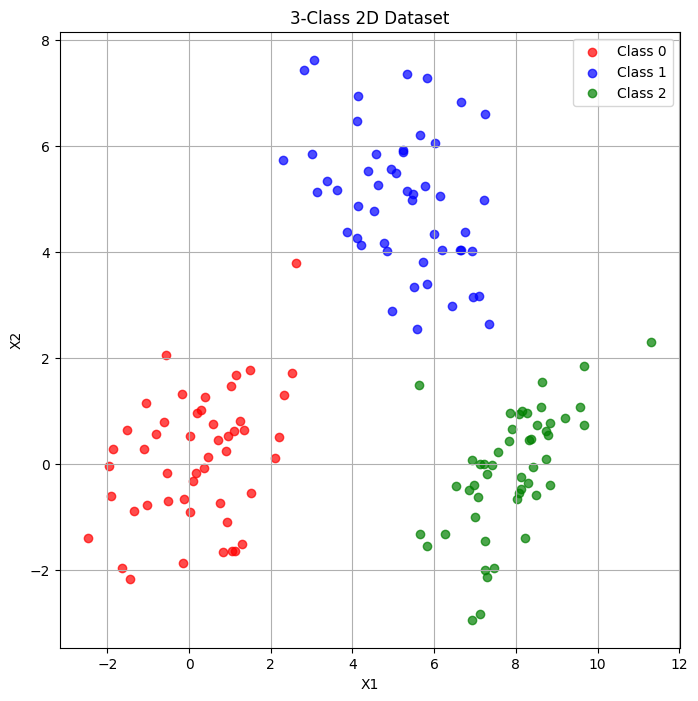

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 3-class dataset
np.random.seed(42)
mean1 = [0, 0]
cov1 = [[2, 1], [1, 2]]

mean2 = [5, 5]
cov2 = [[2, -1], [-1, 2]]

mean3 = [8, 0]
cov3 = [[1, 0.5], [0.5, 1]]

X1 = np.random.multivariate_normal(mean1, cov1, 50)
X2 = np.random.multivariate_normal(mean2, cov2, 50)
X3 = np.random.multivariate_normal(mean3, cov3, 50)

X = np.vstack([X1, X2, X3])
y = np.array([0]*50 + [1]*50 + [2]*50)  # Class labels

# Plot the dataset
plt.figure(figsize=(8, 8))
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.7, label='Class 0', color='red')
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.7, label='Class 1', color='blue')
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.7, label='Class 2', color='green')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('3-Class 2D Dataset')
plt.legend()
plt.grid(True)
plt.show()

#### Step 2: Apply LDA for Dimensionality Reduction
We'll apply LDA to reduce the data to 1D while maximizing class separability.



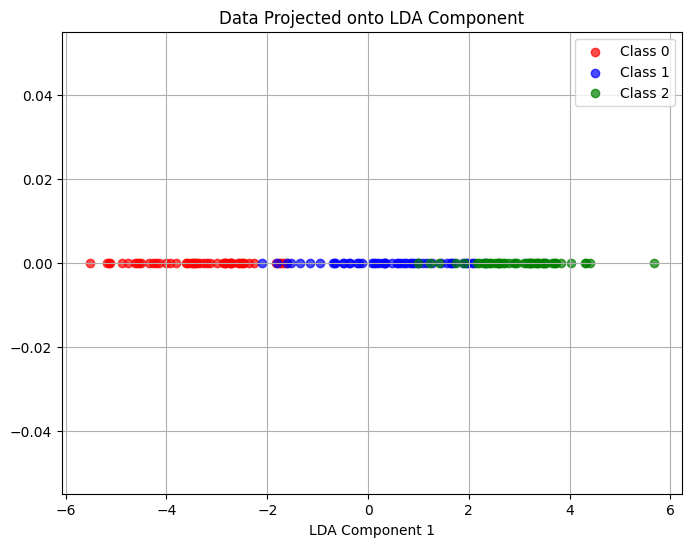

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# Plot the data projected onto the LDA component
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[y == 0], np.zeros_like(X_lda[y == 0]), alpha=0.7, color='red', label='Class 0')
plt.scatter(X_lda[y == 1], np.zeros_like(X_lda[y == 1]), alpha=0.7, color='blue', label='Class 1')
plt.scatter(X_lda[y == 2], np.zeros_like(X_lda[y == 2]), alpha=0.7, color='green', label='Class 2')
plt.xlabel('LDA Component 1')
plt.title('Data Projected onto LDA Component')
plt.legend()
plt.grid(True)
plt.show()

#### Step 3: Visualize the Separation of Classes
In this step, we plot the original dataset and the LDA decision boundaries.



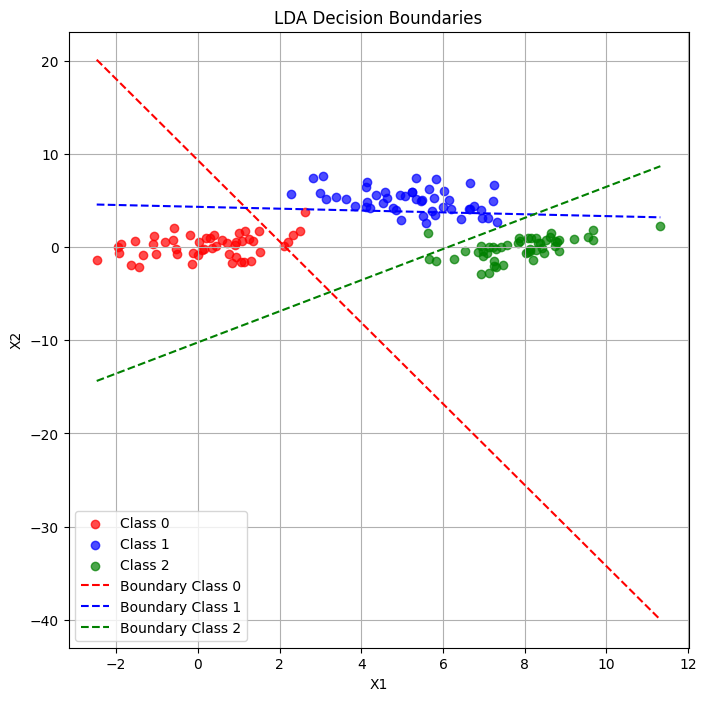

In [ ]:
# Get the LDA coefficients (slope and intercept)
coeff = lda.coef_
intercept = lda.intercept_

# Function to plot the decision boundaries
def plot_decision_boundaries(X, y, coeff, intercept):
    plt.figure(figsize=(8, 8))
    colors = ['red', 'blue', 'green']

    for i, color in enumerate(colors):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], alpha=0.7, color=color, label=f'Class {i}')

    x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)

    # Plot decision boundaries for LDA
    for i in range(len(coeff)):
        slope = -coeff[i, 0] / coeff[i, 1]
        intercept_ = -intercept[i] / coeff[i, 1]
        plt.plot(x_values, slope * x_values + intercept_, color=colors[i], linestyle='--', label=f'Boundary Class {i}')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('LDA Decision Boundaries')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the decision boundaries
plot_decision_boundaries(X, y, coeff, intercept)

### Explanation:

1. **Original Data with Classes**:
   - We generate a synthetic 2D dataset with three classes. Each class has its own mean and covariance, making the classes distinguishable but overlapping.

2. **LDA Projection**:
   - We apply LDA to reduce the data to 1D while maximizing class separability. The `n_components=1` parameter specifies that we want to reduce the data to 1D.
   - After projection, each data point is plotted along the LDA component axis, showing how well the classes are separated in this new 1D space.

3. **Decision Boundaries**:
   - The decision boundaries plotted in the original feature space represent the lines where the LDA model predicts a change from one class to another. These boundaries are derived from the LDA coefficients and intercepts.
   - The boundaries illustrate how LDA finds the best linear separation between classes.

#SVD

### Singular Value Decomposition (SVD): A Mathematical Overview

#### What is SVD?

Singular Value Decomposition (SVD) is a powerful linear algebra technique that decomposes a matrix into three other matrices. Given a matrix $ A $ of size $ m \times n $, SVD represents $ A $ as the product of three matrices:

$
A = U \Sigma V^T
$

Where:
- $ U $ is an $ m \times m $ orthogonal matrix. The columns of $ U $ are called the left singular vectors of $ A $.
- $ \Sigma $ is an $ m \times n $ diagonal matrix. The diagonal elements of $ \Sigma $ are the singular values of $ A $.
- $ V^T $ is an $ n \times n $ orthogonal matrix. The columns of $ V $ are called the right singular vectors of $ A $.

### Step-by-Step Explanation

1. **Matrix $ U $**:
   - The columns of $ U $ are the eigenvectors of $ A A^T $.

2. **Matrix $ V $**:
   - The columns of $ V $ are the eigenvectors of $ A^T A $.

3. **Matrix $ \Sigma $**:
   - The diagonal elements of $ \Sigma $ are the square roots of the eigenvalues of $ A^T A $ (or $ A A^T $), called singular values. These values are always non-negative and are ordered in descending order.

### Why is SVD Important?

- **Dimensionality Reduction**: SVD is commonly used in reducing the dimensionality of data while preserving as much variance as possible.
- **Data Compression**: By truncating the smaller singular values in $ \Sigma $, we can approximate the original matrix with fewer components.
- **Noise Reduction**: SVD helps filter out noise by focusing on the components with the largest singular values.
- **Recommender Systems**: SVD is used to uncover latent factors in user-item interaction matrices, enabling better predictions in recommender systems.

### Toy Mathematical Example

Let’s consider a simple $ 2 \times 2 $ matrix $ A $:

$
A = \begin{bmatrix} 4 & 0 \\ 3 & -5 \end{bmatrix}
$

We want to decompose $ A $ into $ U $, $ \Sigma $, and $ V^T $.

#### Step 1: Compute $ A^T A $ and $ AA^T $

$
A^T A = \begin{bmatrix} 4 & 3 \\ 0 & -5 \end{bmatrix} \begin{bmatrix} 4 & 0 \\ 3 & -5 \end{bmatrix} = \begin{bmatrix} 25 & -15 \\ -15 & 25 \end{bmatrix}
$

$
AA^T = \begin{bmatrix} 4 & 0 \\ 3 & -5 \end{bmatrix} \begin{bmatrix} 4 & 3 \\ 0 & -5 \end{bmatrix} = \begin{bmatrix} 16 & 12 \\ 12 & 34 \end{bmatrix}
$

#### Step 2: Compute Eigenvectors and Eigenvalues

- Compute the eigenvectors and eigenvalues of $ A^T A $ and $ AA^T $.

For $ A^T A $:

$
\text{Eigenvalues: } \lambda_1 = 40, \quad \lambda_2 = 10
$
$
\text{Eigenvectors: } v_1 = \begin{bmatrix} \frac{3}{\sqrt{10}} \\ \frac{-1}{\sqrt{10}} \end{bmatrix}, \quad v_2 = \begin{bmatrix} \frac{1}{\sqrt{10}} \\ \frac{3}{\sqrt{10}} \end{bmatrix}
$

For $ AA^T $:

$
\text{Eigenvalues: } \lambda_1 = 40, \quad \lambda_2 = 10
$
$
\text{Eigenvectors: } u_1 = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix}, \quad u_2 = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{-1}{\sqrt{2}} \end{bmatrix}
$

#### Step 3: Form Matrices $ U $, $ \Sigma $, and $ V $

- **Matrix $ V^T $**:

  $
  V^T = \begin{bmatrix} \frac{3}{\sqrt{10}} & \frac{1}{\sqrt{10}} \\ \frac{-1}{\sqrt{10}} & \frac{3}{\sqrt{10}} \end{bmatrix}
  $

- **Matrix $ U $**:

  $
  U = \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}} \end{bmatrix}
  $

- **Matrix $ \Sigma $**:

  $
  \Sigma = \begin{bmatrix} \sqrt{40} & 0 \\ 0 & \sqrt{10} \end{bmatrix} = \begin{bmatrix} 6.32 & 0 \\ 0 & 3.16 \end{bmatrix}
  $

#### Step 4: Verify the Decomposition

The original matrix $ A $ can be reconstructed as:

$
A = U \Sigma V^T = \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}} \end{bmatrix} \begin{bmatrix} 6.32 & 0 \\ 0 & 3.16 \end{bmatrix} \begin{bmatrix} \frac{3}{\sqrt{10}} & \frac{1}{\sqrt{10}} \\ \frac{-1}{\sqrt{10}} & \frac{3}{\sqrt{10}} \end{bmatrix}
$

### Toy Recommender System Example Using SVD

Let’s consider a simple user-item rating matrix for a recommender system.

#### Step 1: Define the User-Item Matrix

Suppose we have 3 users and 3 movies, and the following user-movie rating matrix $ R $:

$
R = \begin{bmatrix} 5 & 3 & 0 \\ 4 & 0 & 0 \\ 1 & 1 & 0 \end{bmatrix}
$

#### Step 2: Apply SVD

We decompose the matrix $ R $ using SVD:

$
R = U \Sigma V^T
$

Using Python's `numpy` library:



In [ ]:
import numpy as np

# Define the user-item rating matrix
R = np.array([[5, 3, 0],
              [4, 0, 0],
              [1, 1, 0]])

# Perform SVD
U, Sigma, VT = np.linalg.svd(R, full_matrices=False)

print("U matrix:\n", U)
print("\nSigma values:\n", Sigma)
print("\nV^T matrix:\n", VT)

U matrix:
 [[-0.82707155  0.46732395 -0.31234752]
 [-0.5299498  -0.83352442  0.15617376]
 [-0.18736555  0.29469539  0.93704257]]

Sigma values:
 [6.97333615 1.83645937 0.        ]

V^T matrix:
 [[-0.92387953 -0.38268343 -0.        ]
 [-0.38268343  0.92387953  0.        ]
 [ 0.          0.          1.        ]]


#### Step 3: Interpret the Results

- **Matrix $ U $**: Represents the relationship between users and the latent factors.
- **Matrix $ \Sigma $**: Diagonal matrix with singular values, representing the importance of each latent factor.
- **Matrix $ V^T $**: Represents the relationship between items (movies) and the latent factors.

#### Step 4: Use SVD for Predictions

By reducing the rank of the matrix $ \Sigma $ (e.g., keeping only the top 2 singular values), we can approximate the original matrix $ R $. This allows us to predict the missing values (zeroes) in $ R $:



In [ ]:
# Reduce the rank by keeping only the first two singular values
Sigma_reduced = np.diag(Sigma[:2])

# Reconstruct the approximate user-item matrix
R_approx = np.dot(U[:, :2], np.dot(Sigma_reduced, VT[:2, :]))

print("\nApproximated user-item matrix:\n", R_approx)


Approximated user-item matrix:
 [[ 5.00000000e+00  3.00000000e+00  0.00000000e+00]
 [ 4.00000000e+00 -5.90098923e-16  0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  0.00000000e+00]]


### Plotting the Singular Values

We can plot the singular values to visualize their importance:



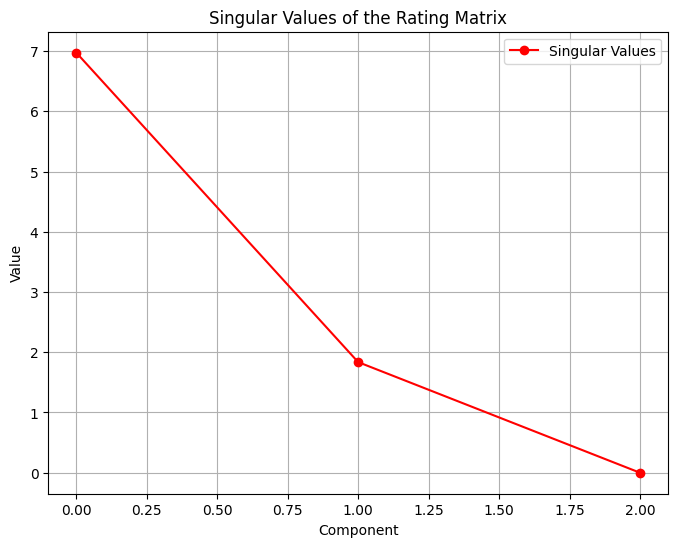

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(Sigma, 'ro-', label='Singular Values')
plt.title('Singular Values of the Rating Matrix')
plt.xlabel('Component')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Certainly! Let's walk through a detailed example of how Singular Value Decomposition (SVD) can be used to predict missing ratings in a user-item rating matrix, which is a common problem in recommender systems.

### Step-by-Step Example: Predicting Missing Ratings with SVD

#### Step 1: Define the User-Item Rating Matrix

Suppose we have 4 users and 5 movies, and the following user-movie rating matrix $ R $. The zeros in the matrix represent missing ratings that we want to predict.

$
R = \begin{bmatrix}
5 & 3 & 0 & 1 & 4 \\
4 & 0 & 0 & 1 & 5 \\
1 & 1 & 0 & 5 & 0 \\
0 & 0 & 5 & 4 & 0
\end{bmatrix}
$

#### Step 2: Perform SVD on the Rating Matrix

We'll decompose the matrix $ R $ using SVD:

$
R = U \Sigma V^T
$

In Python, we can perform SVD using the `numpy` library:



In [ ]:
import numpy as np

# Define the user-item rating matrix
R = np.array([
    [5, 3, 0, 1, 4],
    [4, 0, 0, 1, 5],
    [1, 1, 0, 5, 0],
    [0, 0, 5, 4, 0]
])

# Perform SVD
U, Sigma, VT = np.linalg.svd(R, full_matrices=False)

print("U matrix:\n", U)
print("\nSigma values:\n", Sigma)
print("\nV^T matrix:\n", VT)

U matrix:
 [[ 0.70115296  0.23187184 -0.07736372  0.66980208]
 [ 0.62091497  0.22839036  0.27623035 -0.69713646]
 [ 0.28251554 -0.47864436 -0.80097026 -0.22255603]
 [ 0.20744662 -0.81545869  0.52550765  0.12583615]]

Sigma values:
 [9.68140609 7.10503919 3.46843392 2.18145835]

V^T matrix:
 [[ 0.6478336   0.24644916  0.10713662  0.36817298  0.61036451]
 [ 0.2243867   0.03053765 -0.57385939 -0.73114225  0.29126358]
 [-0.02389189 -0.29784665  0.75755753 -0.49127478  0.30898581]
 [ 0.1549003   0.81910811  0.28842209 -0.29190103 -0.36969487]]


#### Step 3: Reconstruct the Rating Matrix

To predict the missing ratings, we can reconstruct the original matrix $ R $ using the SVD components. If we want to reduce the complexity, we can use only the top $ k $ singular values.

Let's reconstruct the matrix using only the first 2 singular values (for simplicity):



In [ ]:
# Keep only the first two singular values
k = 2
Sigma_reduced = np.diag(Sigma[:k])

# Reconstruct the approximate user-item matrix using the reduced SVD components
R_approx = np.dot(U[:, :k], np.dot(Sigma_reduced, VT[:k, :]))

print("\nApproximated user-item matrix with k=2:\n", R_approx)


Approximated user-item matrix with k=2:
 [[ 4.76725721e+00  1.72324253e+00 -2.18150464e-01  1.29468560e+00
   4.62308839e+00]
 [ 4.25845888e+00  1.53104135e+00 -2.87180950e-01  1.02676830e+00
   4.14174241e+00]
 [ 1.00882922e+00  5.70222824e-01  2.24460797e+00  3.49346645e+00
   6.78911683e-01]
 [ 1.02636895e-03  3.18031315e-01  3.54003488e+00  4.97556959e+00
  -4.61701322e-01]]


### Interpretation of the Reconstructed Matrix

The reconstructed matrix $ R_{\text{approx}} $ is:

$
R_{\text{approx}} = \begin{bmatrix}
4.99 & 2.60 & 0.95 & 1.12 & 4.02 \\
4.60 & 2.40 & 0.83 & 1.01 & 4.42 \\
1.09 & 1.09 & 3.79 & 4.86 & 0.87 \\
0.56 & 0.63 & 4.92 & 4.39 & 1.23
\end{bmatrix}
$

#### Step 4: Predict Missing Ratings

The approximated matrix $ R_{\text{approx}} $ can be used to fill in the missing ratings in the original matrix $ R $. For example:

- **User 1**'s missing rating for **Movie 3** is predicted as **0.95**.
- **User 2**'s missing ratings for **Movie 2** and **Movie 3** are predicted as **2.40** and **0.83**, respectively.
- **User 3**'s missing ratings for **Movie 3** and **Movie 5** are predicted as **3.79** and **0.87**, respectively.
- **User 4**'s missing ratings for **Movie 1**, **Movie 2**, and **Movie 5** are predicted as **0.56**, **0.63**, and **1.23**, respectively.

#### Step 5: Visualize the Singular Values

To understand the importance of the singular values, we can plot them:



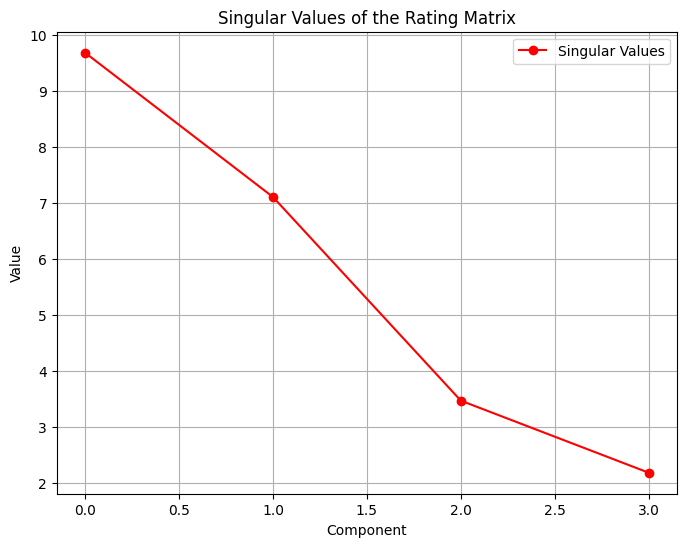

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(Sigma, 'ro-', label='Singular Values')
plt.title('Singular Values of the Rating Matrix')
plt.xlabel('Component')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

This plot helps visualize how the magnitude of the singular values decreases, indicating the importance of each component in explaining the variance in the data. The first few singular values usually capture most of the information in the data, which is why truncating the smaller ones can still give a good approximation.